# Spirale d'Ekman océanique : 

L'équation pour les composantes \( u(z, t) \) et \( v(z, t) \) s'écrit :

$$  \left\{ \begin{matrix} -fv = - \frac{\partial}{\partial z} ( K\frac{\partial u}{\partial z}) \cr fu = - \frac{\partial}{\partial z} ( K\frac{\partial v}{\partial z}) \end{matrix} \right. $$

Avec $ f = 2\Omega sin\Phi $ le paramètre de Coriolis (où $ \Phi $ est la latitude), et $K$ le coefficient de viscosité turbulente.

On modélise la viscosité turbulente \(K(z,t) \) à l'aide d'une longueur de mélande \( l(z) \) telle que :

$ K = \nu + l^2 \sqrt{\left( \frac{\partial u}{\partial z} \right) ^2 + \left( \frac{\partial v}{\partial z} \right) ^2 } $

avec $ l(z) = \frac{\kappa z}{1 + \kappa z /\lambda} $, où $\kappa = 0,41$ est la constante de Von Karmann, $ \lambda = 2,7 10^{-4}u_g/f $ et $ \nu = 0,1m^2.s^{-1} $ la viscosité moléculaire.

En notant $ \tau = \rho u_*^2 $ la tension du vent où $ \rho $ est la masse volumique de l'eau et $ u_* $ la vitesse de frottement.
On définit $ z_0 $ comme la "rugosité" de la mer vue par le vent, formée par les vagues de longueur d'onde proche d'un mètre.

Conditions au limites :

*   $ u(-H, t) = v(-H, t) = 0 $ où $ H $ est la profondeur de la couche limite
*   $ K(-z_0,t)\frac{\partial u}{\partial z}(-z_0, t) = u_*^2 $ et $ \frac{\partial u}{\partial z}(-z_0, t) = 0 $


## Résolution grâce à la méthode d'Euler
$\delta t = 1s$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Fuv(u,v):
    dudz=(u[1:]-u[:-1])/dz
    dvdz=(v[1:]-v[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    Kdudz=K*dudz; Kdvdz=K*dvdz
    Fu=f*v[1:-1]+(Kdudz[1:]-Kdudz[:-1])/dz
    Fv=-f*u[1:-1]+(Kdvdz[1:]-Kdvdz[:-1])/dz
    return Fu,Fv,K

def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def advance(u,v):
    for n in range(Nt):
        Fu,Fv,K=Fuv(u,v)
        u[-1]=u[-2]+usc/K[-1]*dz
        v[-1]=v[-2]
        u[1:-1]=u[1:-1]+dt*Fu
        v[1:-1]=v[1:-1]+dt*Fv
        if (n-1)%nplot==0:
            t=round(n*dt/3600)
            plt.xlabel(r'$v$ et $u$',fontsize=16 )
            plt.ylabel(r'Altitude $z$',fontsize=16)    
            plt.xlim(xmin,xmax)
            plt.ylim(ymin,ymax)          
            plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
            plt.plot(u,z,linewidth=3,color='green')
            plt.plot(v,z,linewidth=3,color='green')
            #plt.plot(ul,z,linewidth=3,color='blue')
            #plt.plot(vl,z,linewidth=3,color='blue')
            plt.savefig(zfi(t,2)+'h.png')
            print(zfi(t,2)+'h.png')
            plt.show()
    return u,v

## Définition des paramètres : 

*   `f = 1.e-4` est le coefficient de Coriolis, à la latitude $45°N$
*   `us=.1` est la vitesse de frottement à la surface
*   `H=500` est la profondeur de la couche limite
*   `z0=1` est la longueur de rugosité
*   `K0=.3` est le coefficient de viscosité turbulente


In [ ]:
k=0.41; f=1.e-4;  nu=.1
us=.1; usc=us**2 
H=500; z0=1; K0=.3;
gam=np.sqrt(f/(2*K0)); 
u0=usc/np.sqrt(f*K0)

Nhour=100
Nz=100; usdt=1; dt=1/usdt; Nt=Nhour*3600*usdt
z=np.linspace(-H,z0,Nz+2); 
dz=H/Nz; 
zh=.5*(z[1:]+z[:-1])

# laminar solution
ul=u0*np.exp(gam*(z-z0))*np.cos(gam*(z-z0)-np.pi/4)
vl=u0*np.exp(gam*(z-z0))*np.sin(gam*(z-z0)-np.pi/4)
uls=ul[-1]; vls=vl[-1]
xmin=-1.5*uls; xmax=1.5*uls; 
ymin=-H; ymax=0;

print(f'longeur de rugosité z0 = {z0}')
print(f'vitesse de frottement à la surface u* = {us}')
print(f'profondeur de la couche limite H = {H}')
print(f'coefficient de viscosité turbulent K0 = {K0}')
print(f'coefficent coriolis f = {f}')
print(f'vitesse initiale u0= {u0}')

la=2.7e-4*u0/f
l=la*k*zh/(la-k*zh)

longeur de rugosité z0 = 1
vitesse de frottement à la surface u* = 0.1
profondeur de la couche limite H = 500
coefficient de viscosité turbulent K0 = 0.3
coefficent coriolis f = 0.0001
vitesse initiale u0= 1.825741858350554


## Longeur de mélange l(z) :

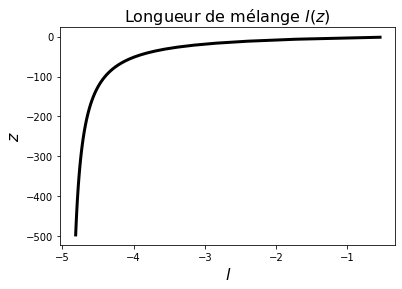

In [ ]:
# Figure
plt.xlabel(r'$l$',fontsize=16 )
plt.ylabel(r'$z$',fontsize=16) 
plt.title(r"Longueur de mélange $l(z)$",fontsize=16)
plt.plot(l,zh,linewidth=3,color='black')
plt.savefig("lOcean.pdf")
plt.savefig("lOcean.png")
plt.show()

## Coefficient de Viscosité turbulent K(z, t=0)

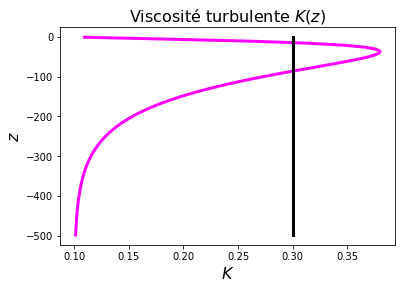

In [ ]:
# K initial
plt.xlabel(r'$K$',fontsize=16 )
plt.ylabel(r'$z$',fontsize=16) 
plt.title(r"Viscosité turbulente $K(z)$",fontsize=16)
dudz=(ul[1:]-ul[:-1])/dz
dvdz=(vl[1:]-vl[:-1])/dz
K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
plt.plot(K,zh,linewidth=3,color='magenta')
plt.plot(K0+0*K,zh,linewidth=3,color='black')
plt.show()

## Gif animé spirale d'Ekman latitude 45N :

00h.png


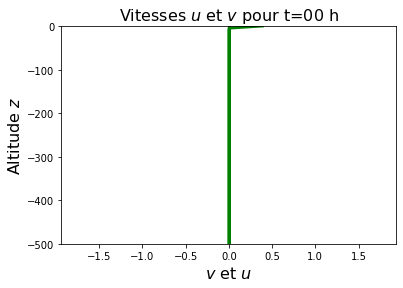

05h.png


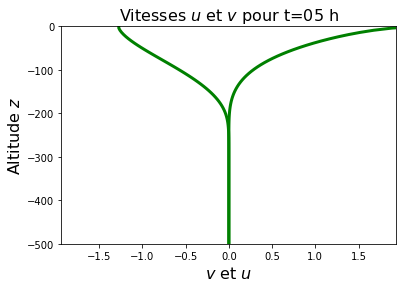

10h.png


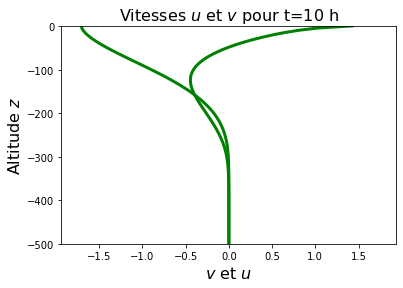

15h.png


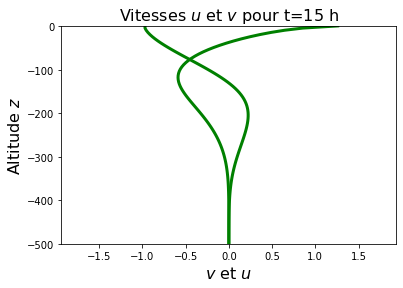

20h.png


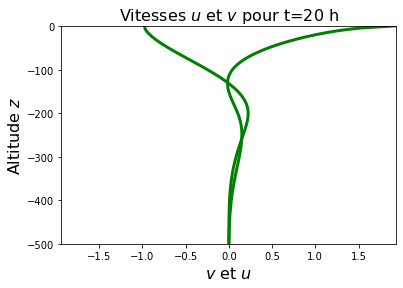

25h.png


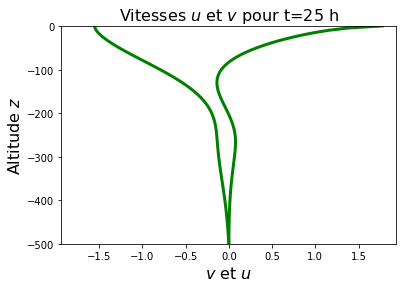

30h.png


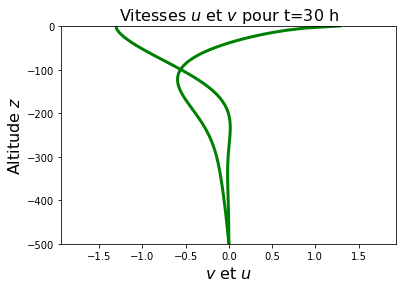

35h.png


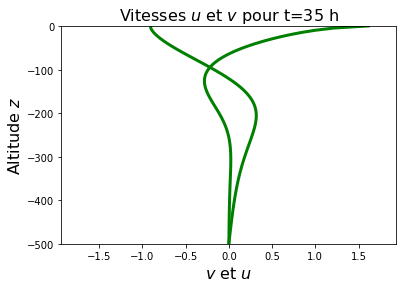

40h.png


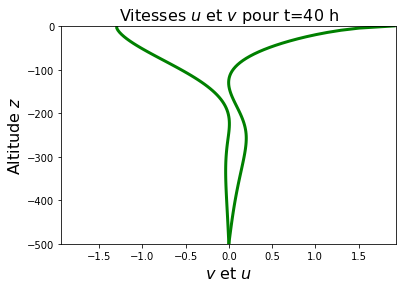

45h.png


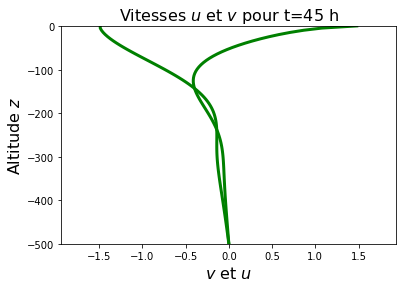

50h.png


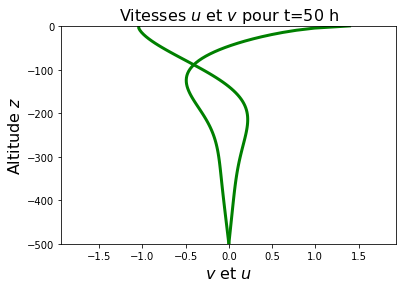

55h.png


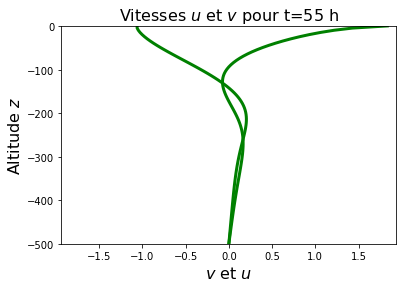

60h.png


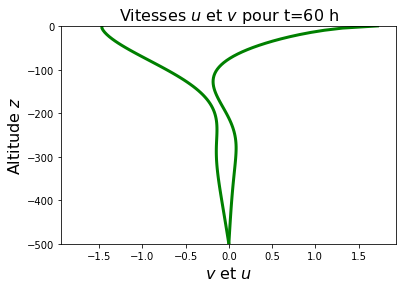

65h.png


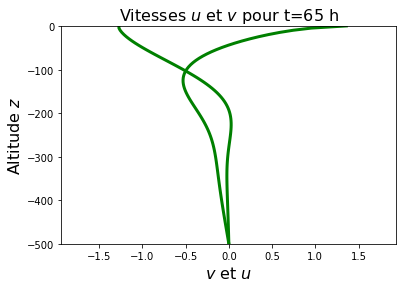

70h.png


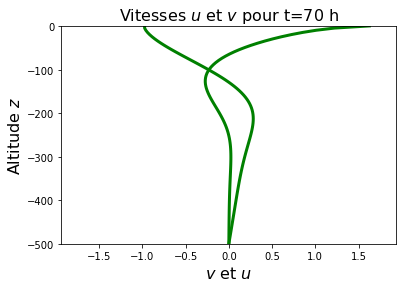

75h.png


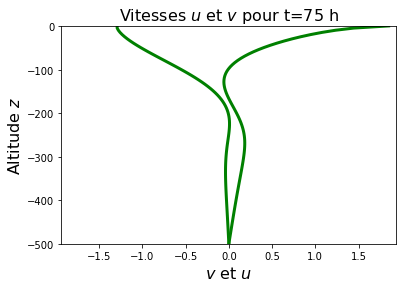

80h.png


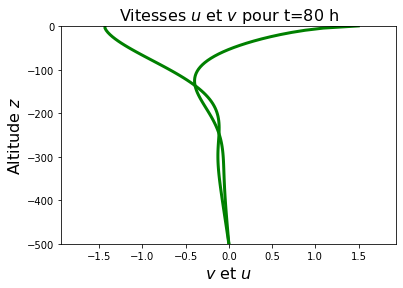

85h.png


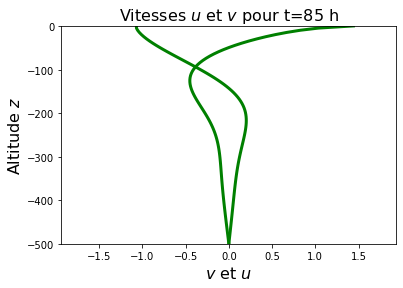

90h.png


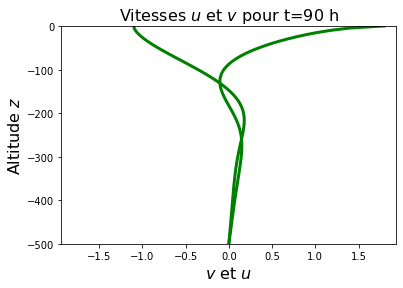

95h.png


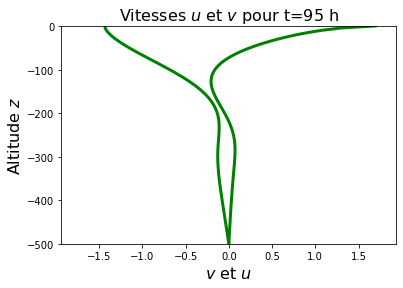

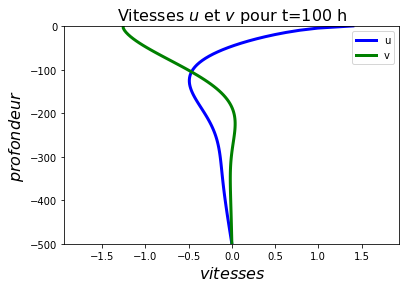

In [ ]:
# temporal 
nplot=5*3600*usdt

u = 0*z
v = 0*z

u,v=advance(u,v)
    
# final 
t=round(Nt*dt/3600);
plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
       
# avec longueur de melange
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)          
plt.plot(u,z,linewidth=3,color='blue',label="u")
plt.plot(v,z,linewidth=3,color='green',label="v")
plt.xlabel(r'$vitesses$',fontsize=16)
plt.ylabel(r'$profondeur$',fontsize=16)
plt.legend()

In [ ]:
# Build GIF
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

f = np.arange(0,100,5)
files = []
for fi in f:
  files.append(f'{fi}h.png')

files[0] = '00h.png'
files[1] = '05h.png'
files.append('95h.png')

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)
      


# Solution : 
On choisit une viscosité turbulante constante $ K_0 = 0,3 m^2.s^{-1} $, une longeur de rugosité des vagues $ z_0 = 1 m$. On fait varier la latitude $ \Phi $ de $ 5°N $ à $ 85°N $. L'équation de la spirale d'Ekman s'écrit :

$$\left\{ \begin{matrix} u(z) = u_0 \exp{\frac{z-z_0}{ \delta _e}} \cos{ \left( \frac{z-z_0}{ \delta _e} - \pi /4 \right) } \cr v(z) = u_0 \exp{\frac{z-z_0}{ \delta _e}} \sin{ \left( \frac{z-z_0}{ \delta _e} - \pi /4 \right) } \end{matrix} \right.$$

avec l'épaisseur de la couche d'Ekman $\delta _e = \sqrt{\frac{2K_0}{f}}$, et la vitesse initianle $u_0 = \frac{ u_*^2 }{\sqrt{fK_0}}$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import *

z0, ustar, k0, omega, angle_phi = -10, 0.1, 0.3, 7.2e-5, pi/2

liste_angle = [i*pi/180 for i in range(5,85,5)]

def u(z,phi):
    f = 2*omega*sin(phi)
    deltae = sqrt(2*k0/f)
    u0 = ustar**2/sqrt(f*k0)
    resu = u0*exp((z-z0)/deltae)*cos((z-z0)/deltae-pi/4)
    return resu

def v(z,phi):
    f = 2*omega*sin(phi)
    deltae = sqrt(2*k0/f)
    u0 = ustar**2/sqrt(f*k0)
    resv = u0*exp((z-z0)/deltae)*sin((z-z0)/deltae-pi/4)
    return resv

## Spirale d'Ekman en 2D en fonction de la tatitude

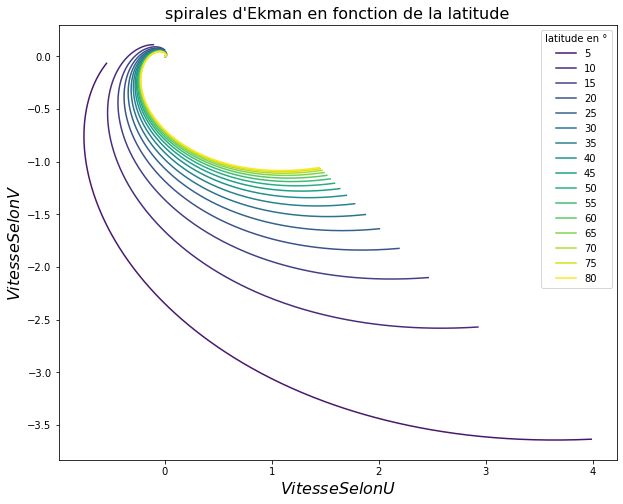

In [ ]:
fig = plt.figure(1, figsize=(10, 8))
color = plt.get_cmap('viridis')
profondeur = [i for i in range(0, -500, -1)]
for ang_phi in liste_angle:
    vitesseu = []
    vitessev = []
    for i in profondeur:
      vitesseu.append(u(i,ang_phi))
      vitessev.append(v(i,ang_phi))
    plt.plot(vitesseu, vitessev, color=color(ang_phi/liste_angle[-1]), label=str(round(ang_phi*360/(2*np.pi))))
# ax.plot(vitessev, profondeur, label="v")
plt.xlabel(r'$VitesseSelonU$',fontsize=16 )
plt.ylabel(r'$VitesseSelonV$',fontsize=16 )
plt.legend(title="latitude en °")
plt.title(r"spirales d'Ekman en fonction de la latitude",fontsize=16)
plt.show()

## Profils de vitesse $u(z)$ à t final pour différentes latitudes: 

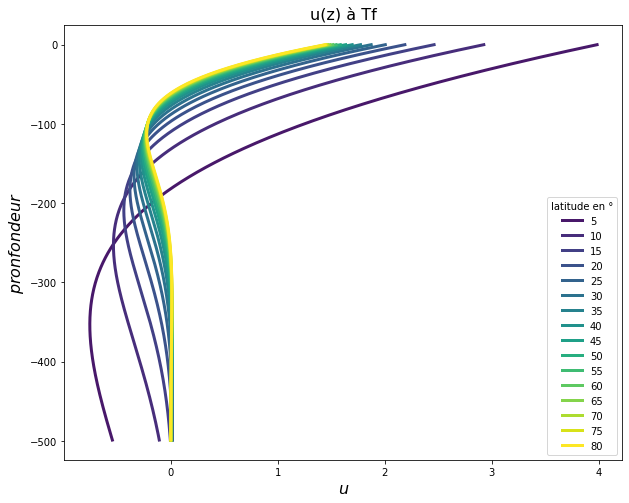

In [ ]:
fig = plt.figure(2, figsize=(10, 8))
color = plt.get_cmap('viridis')

profondeur = [i for i in range(0, -500, -1)]
for ang_phi in liste_angle:
  vitesse = []
  for i in profondeur:
    vitesse.append(u(i, ang_phi))
  plt.plot(vitesse,profondeur,linewidth=3, color=color(ang_phi/liste_angle[-1]), label=str(round(ang_phi*360/(2*np.pi))))
plt.xlabel(r'$u$',fontsize=16 )
plt.ylabel(r'$pronfondeur$',fontsize=16)
plt.title(r"u(z) à Tf",fontsize=16)
plt.legend(title="latitude en °")

#   plt.savefig("lOcean.pdf")
#   plt.savefig("lOcean.png")
plt.show()

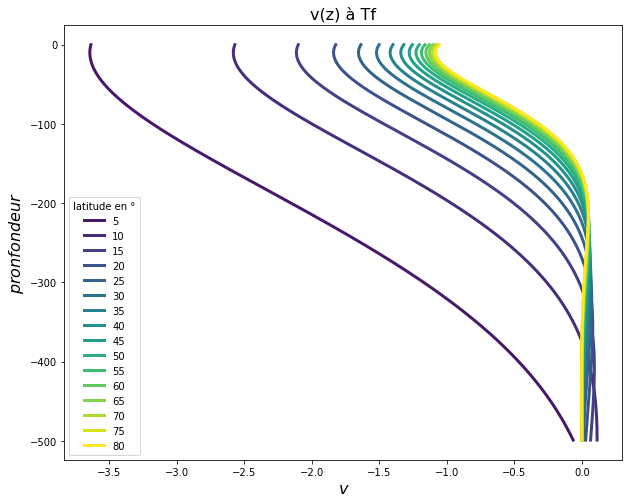

In [ ]:
fig = plt.figure(3, figsize=(10, 8))
color = plt.get_cmap('viridis')

profondeur = [i for i in range(0, -500, -1)]
for ang_phi in liste_angle:
  vitesse = []
  for i in profondeur:
    vitesse.append(v(i, ang_phi))
  plt.plot(vitesse,profondeur,linewidth=3, color=color(ang_phi/liste_angle[-1]), label=str(round(ang_phi*360/(2*np.pi))))
plt.xlabel(r'$v$',fontsize=16 )
plt.ylabel(r'$pronfondeur$',fontsize=16)
plt.title(r"v(z) à Tf",fontsize=16)
plt.legend(title="latitude en °")

#   plt.savefig("lOcean.pdf")
#   plt.savefig("lOcean.png")
plt.show()

## Vitesses $u(z)$ et $v(z)$ à t final :

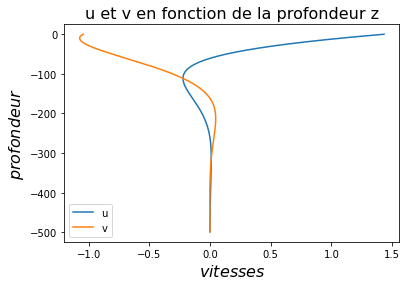

In [ ]:
profondeur = [i for i in range(0, -500, -1)]
vitesseu = []
vitessev = []
for i in profondeur:
    vitesseu.append(u(i, np.pi/2))
    vitessev.append(v(i, np.pi/2))
fig, ax = plt.subplots()
plt.xlabel(r'$vitesses$',fontsize=16 )
plt.ylabel(r'$profondeur$',fontsize=16 )
plt.title(r"u et v en fonction de la profondeur z",fontsize=16)
plt.plot(vitesseu, profondeur, label="u")
plt.plot(vitessev, profondeur, label="v")
ax.legend()
plt.show()

## Spirale d'Ekman en 3D

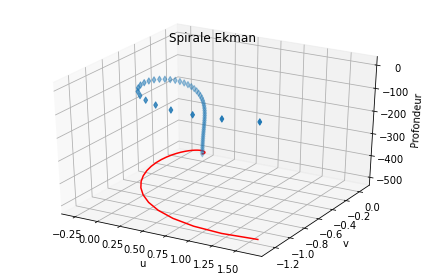

In [ ]:
from mpl_toolkits.mplot3d import axes3d

# Latitude 45N
z1 = np.linspace(0, -500,50)
xdata = []
ydata = []
for i in z1:
    xdata.append(u(i,pi/4))
    ydata.append(v(i,pi/4))
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(xdata, ydata, z1, label='Courbe', marker='d')  # Tracé des points 3D
ax.plot(xdata, ydata, -500, label='Spirale Ekman', color = 'r')
plt.title("Points 3D")
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('Profondeur')
plt.title('Spirale Ekman')
plt.tight_layout()
plt.show()

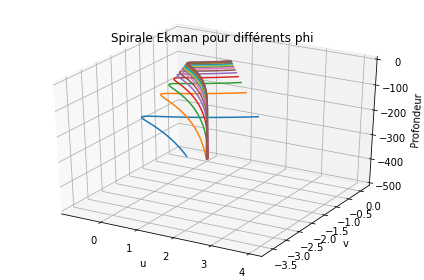

In [ ]:
# Latitude de 5 à 85N
z1 = np.linspace(0, -500,50)
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
for ang_phi in liste_angle:
    xdata = []
    ydata = []
    for i in z1:
        xdata.append(u(i,ang_phi))
        ydata.append(v(i,ang_phi))
    ax.plot(xdata, ydata, z1, label=ang_phi)
plt.title("Points 3D")
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('Profondeur')
plt.title('Spirale Ekman pour différents phi')
plt.tight_layout()
plt.show()